In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle #loading from script


In [9]:
dataset_link = "stoney71/aflstats" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 2.62M/2.62M [00:00<00:00, 6.28MB/s]

Extracting files...
Loading dataset from /Users/kat/.cache/kagglehub/datasets/stoney71/aflstats/versions/5 to ../data/raw/aflstats
Moving file: /Users/kat/.cache/kagglehub/datasets/stoney71/aflstats/versions/5/stats.csv to /Users/kat/Documents/Stackfuel/Biomech_Project_2025/notebooks/../data/raw/aflstats
Moving file: /Users/kat/.cache/kagglehub/datasets/stoney71/aflstats/versions/5/players.csv to /Users/kat/Documents/Stackfuel/Biomech_Project_2025/notebooks/../data/raw/aflstats
Moving file: /Users/kat/.cache/kagglehub/datasets/stoney71/aflstats/versions/5/games.csv to /Users/kat/Documents/Stackfuel/Biomech_Project_2025/notebooks/../data/raw/aflstats
Files moved to '../data/raw/aflstats' directory.


In [10]:
files

['stats.csv', 'players.csv', 'games.csv']

In [11]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,GameId,Team,Year,Round,PlayerId,DisplayName,GameNumber,Disposals,Kicks,Marks,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,%Played,Subs
0,2012R0105,Adelaide,2012,R1,2011675768,"Callinan, Ian",4,18,14,5,...,0,9,9,0,3,0,0,0,84,-
1,2012R0105,Adelaide,2012,R1,2008681760,"Dangerfield, Patrick",65,25,13,3,...,0,14,11,0,1,1,1,0,92,-
2,2012R0105,Adelaide,2012,R1,2000686938,"Doughty, Michael",208,17,5,4,...,0,8,8,0,0,2,0,0,81,-
3,2012R0105,Adelaide,2012,R1,2006687579,"Douglas, Richard",96,19,14,6,...,0,6,16,0,1,5,0,2,83,-
4,2012R0105,Adelaide,2012,R1,2010728130,"Henderson, Ricky",31,8,5,1,...,0,2,5,0,0,1,0,1,36,Off


In [12]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(118864, 31)

'Description'

,count,mean,std,min,25%,50%,75%,max
Year,118864.0,2.018070e+03,3.79,2.012000e+03,2.015000e+03,2.018000e+03,2.021000e+03,2.024000e+03
PlayerId,118864.0,2.013402e+09,5164237.53,1.993708e+09,2.009835e+09,2.012905e+09,2.016875e+09,2.024878e+09
GameNumber,118864.0,9.555000e+01,75.64,1.000000e+00,3.300000e+01,7.900000e+01,1.420000e+02,4.320000e+02
Disposals,118864.0,1.619000e+01,7.30,0.000000e+00,1.100000e+01,1.500000e+01,2.100000e+01,5.400000e+01
Kicks,118864.0,9.350000e+00,4.67,0.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01,3.600000e+01
Marks,118864.0,4.000000e+00,2.56,0.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,2.100000e+01
Handballs,118864.0,6.830000e+00,4.34,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,3.500000e+01
Goals,118864.0,5.500000e-01,0.95,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01
Behinds,118864.0,3.900000e-01,0.71,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
HitOuts,118864.0,1.710000e+00,6.53,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
GameId,object,0,2663,"[2023R0902, 2024R1706, 2018R2203]"
Team,object,0,18,"[Hawthorn, Geelong, Collingwood]"
Year,int64,0,13,"[2024, 2013, 2018]"
Round,object,0,30,"[R14, R16, R7]"
PlayerId,int64,0,1725,"[2011872415, 2018824025, 2023672014]"
DisplayName,object,0,1713,"[Blease, Sam, Bolton, Jude, Hoskin-Elliott, Will]"
GameNumber,int64,0,432,"[52, 36, 1]"
Disposals,int64,0,54,"[19, 24, 13]"
Kicks,int64,0,37,"[6, 8, 18]"
Marks,int64,0,22,"[3, 8, 6]"


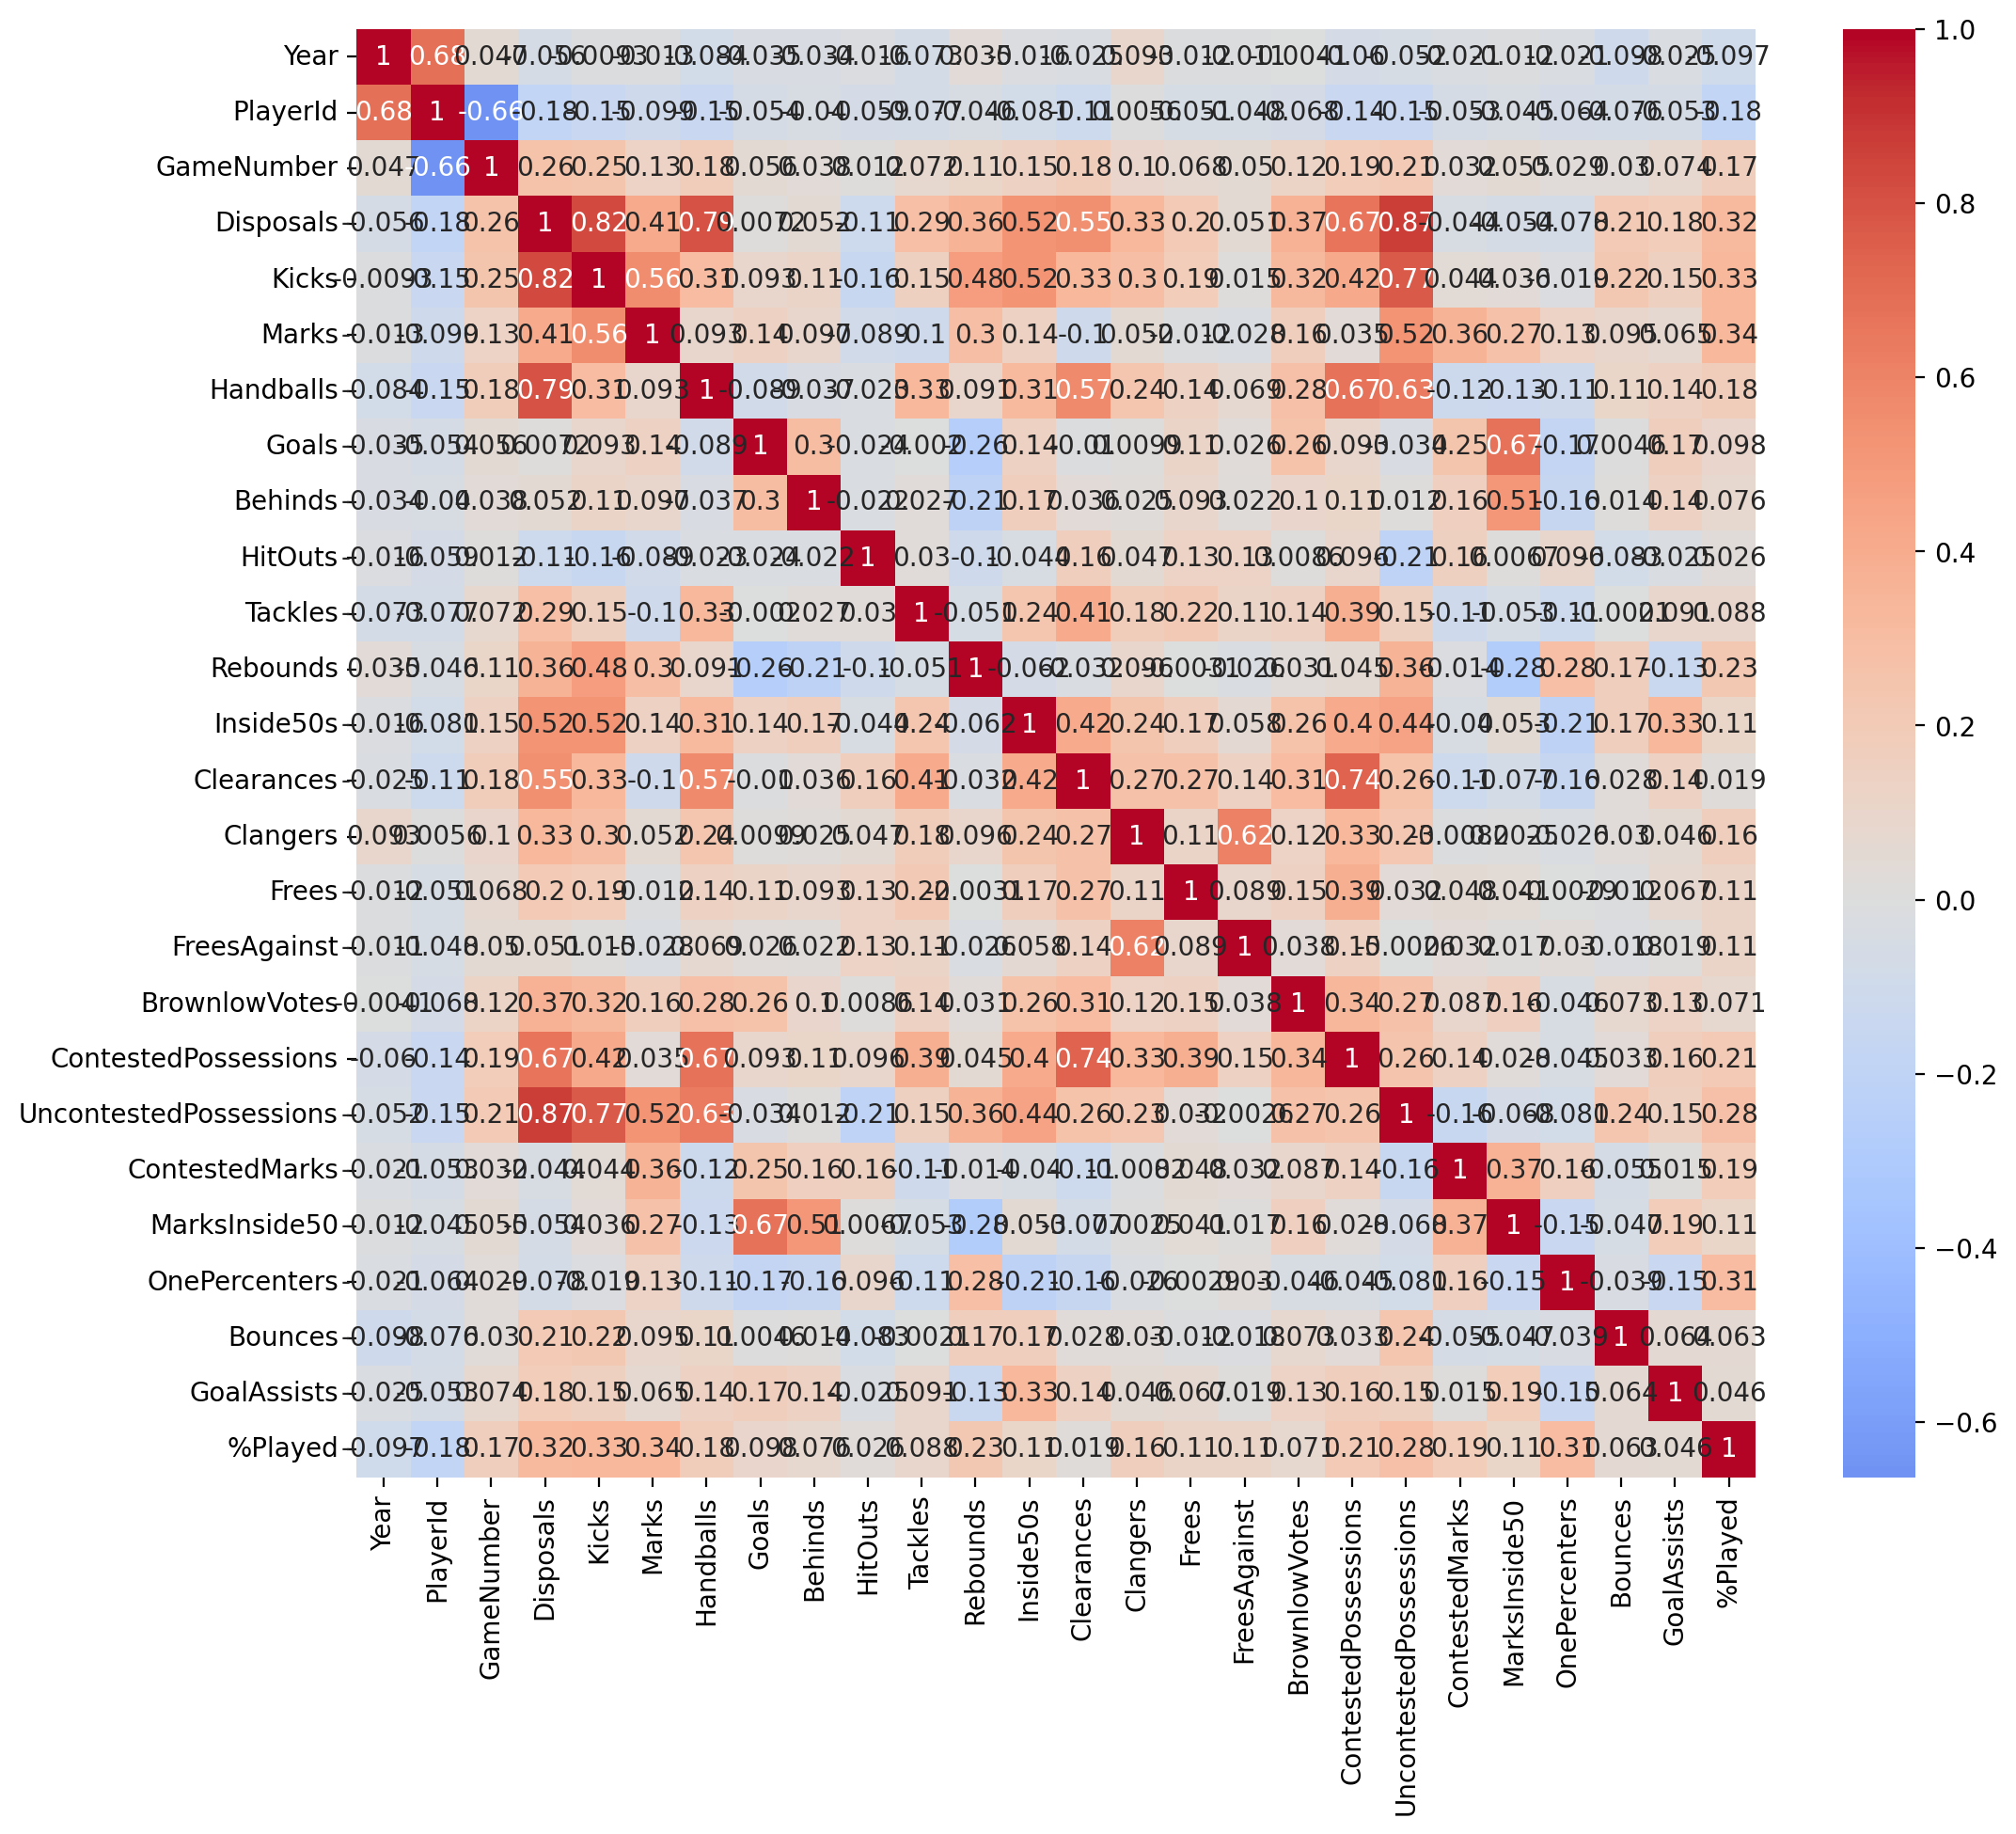

In [13]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [ ]:
import kloppy
from kloppy import skillcorner

match_id = 1886347

dataset = skillcorner.load_open_data(
    match_id=match_id,
    # Optional Parameters
    coordinates="skillcorner",  # or specify a different coordinate system
    sample_rate=(1 / 2),  # changes the data from 10fps to 5fps
    limit=100,  # only load the first 100 frames
)


In [15]:
print(dataset.metadata)


Metadata(periods=[Period(id=1, start_timestamp=datetime.timedelta(seconds=1), end_timestamp=datetime.timedelta(seconds=2779), prev_period=None, next_period=Period(id=2, start_timestamp=datetime.timedelta(seconds=2780), end_timestamp=datetime.timedelta(seconds=5906), prev_period=..., next_period=None)), Period(id=2, start_timestamp=datetime.timedelta(seconds=2780), end_timestamp=datetime.timedelta(seconds=5906), prev_period=Period(id=1, start_timestamp=datetime.timedelta(seconds=1), end_timestamp=datetime.timedelta(seconds=2779), prev_period=None, next_period=...), next_period=None)], teams=[Team(team_id=4177, name='Auckland FC', ground=home, starting_formation=None, formations=<TimeContainer>, players=[<Player name='Guillermo Luis May Bartesaghi' player_id='38673'>, <Player name='Callan Elliot' player_id='51713'>, <Player name='Jake Brimmer' player_id='50951'>, <Player name='Francis De Vries' player_id='133498'>, <Player name='Nando Pijnaker' player_id='33697'>, <Player name='Daniel Ha

In [ ]:
df = (
    dataset.transform(
        to_orientation="STATIC_HOME_AWAY"
    )  # Now, all attacks happen from left to right
    .filter(lambda frame: frame.period.id == 1)  # Only keep frames from the first half
    .to_df(
        engine="pandas"
    )

In [12]:
df.describe()

,period_id,timestamp,frame_id,ball_owning_team_id,ball_x,ball_y,ball_z,51009_x,51009_y,176224_x,...,23418_x,23418_y,133501_x,133501_y,965685_x,965685_y,50951_x,50951_y,38673_x,38673_y
count,199.0,199,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,198.000000,198.000000,199.000000,199.000000,199.000000,199.000000
mean,1.0,0 days 00:00:25.415075376,264.150754,2901.603015,18.639548,4.948543,0.536131,42.916231,1.385075,28.605829,...,10.192864,10.629447,14.930503,-16.186080,15.474192,18.263737,17.454724,6.321357,21.994724,-5.926432
std,0.0,0 days 00:00:13.364916150,133.649162,1185.608635,26.808684,18.315735,0.699424,4.736661,3.419127,14.568520,...,22.188262,13.652268,17.222921,7.794871,17.997446,8.057838,13.271023,11.117952,14.495787,8.660644
min,1.0,0 days 00:00:01.800000,28.000000,1805.000000,-27.470000,-24.130000,0.080000,36.320000,-4.640000,6.390000,...,-20.780000,-12.160000,-15.290000,-30.600000,-11.810000,-0.680000,-4.920000,-12.710000,-1.760000,-25.330000
25%,1.0,0 days 00:00:11.700000,127.000000,1805.000000,-9.030000,-12.040000,0.150000,39.005000,-0.715000,14.715000,...,-9.105000,-0.915000,-1.180000,-22.750000,-4.290000,15.437500,3.145000,-0.710000,8.505000,-10.355000
50%,1.0,0 days 00:00:26.800000,278.000000,1805.000000,27.240000,1.600000,0.270000,42.270000,1.230000,25.800000,...,1.000000,11.390000,13.380000,-15.500000,23.120000,19.670000,16.410000,6.170000,19.600000,-4.220000
75%,1.0,0 days 00:00:36.700000,377.000000,4177.000000,43.340000,26.750000,0.490000,47.535000,2.975000,44.395000,...,28.300000,24.375000,30.255000,-9.445000,33.952500,24.640000,30.830000,15.510000,35.160000,1.545000
max,1.0,0 days 00:00:46.600000,476.000000,4177.000000,48.350000,32.380000,3.270000,50.580000,8.290000,46.820000,...,49.330000,29.980000,43.460000,-5.150000,38.090000,30.540000,34.210000,23.590000,43.040000,5.060000


In [11]:
df




,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,51009_x,...,965685_d,965685_s,50951_x,50951_y,50951_d,50951_s,38673_x,38673_y,38673_d,38673_s
0,1,0 days 00:00:01.800000,28,alive,1805,-0.03,0.36,0.33,None,40.71,...,None,None,0.07,8.13,None,None,-1.76,-9.23,None,None
1,1,0 days 00:00:02,30,alive,1805,2.58,0.12,0.35,None,40.66,...,None,None,0.52,7.85,None,None,-1.59,-9.30,None,None
2,1,0 days 00:00:02.200000,32,alive,1805,6.16,-0.09,0.31,None,40.59,...,None,None,1.11,7.50,None,None,-1.35,-9.43,None,None
3,1,0 days 00:00:02.400000,34,alive,1805,9.40,-0.21,0.28,None,40.52,...,None,None,1.83,7.09,None,None,-1.02,-9.63,None,None
4,1,0 days 00:00:02.600000,36,alive,1805,12.16,-0.36,0.27,None,40.47,...,None,None,2.66,6.64,None,None,-0.57,-9.87,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1,0 days 00:00:45.800000,468,alive,1805,47.26,-12.71,0.15,None,48.09,...,None,None,33.45,0.13,None,None,34.65,-11.24,None,None
195,1,0 days 00:00:46,470,alive,1805,47.28,-12.06,0.14,None,48.34,...,None,None,33.67,0.19,None,None,34.69,-11.15,None,None
196,1,0 days 00:00:46.200000,472,alive,1805,47.17,-11.97,0.14,None,48.58,...,None,None,33.88,0.33,None,None,34.77,-11.03,None,None
197,1,0 days 00:00:46.400000,474,alive,1805,47.06,-12.02,0.13,None,48.80,...,None,None,34.06,0.52,None,None,34.88,-10.91,None,None


In [21]:
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 97 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   period_id            199 non-null    int64          
 1   timestamp            199 non-null    timedelta64[ns]
 2   frame_id             199 non-null    int64          
 3   ball_state           199 non-null    object         
 4   ball_owning_team_id  199 non-null    int64          
 5   ball_x               199 non-null    float64        
 6   ball_y               199 non-null    float64        
 7   ball_z               199 non-null    float64        
 8   ball_speed           0 non-null      object         
 9   51009_x              199 non-null    float64        
 10  51009_y              199 non-null    float64        
 11  51009_d              0 non-null      object         
 12  51009_s              0 non-null      object         
 13  176224_x            

Index(['period_id', 'timestamp', 'frame_id', 'ball_state',
       'ball_owning_team_id', 'ball_x', 'ball_y', 'ball_z', 'ball_speed',
       '51009_x', '51009_y', '51009_d', '51009_s', '176224_x', '176224_y',
       '176224_d', '176224_s', '51649_x', '51649_y', '51649_d', '51649_s',
       '50983_x', '50983_y', '50983_d', '50983_s', '735578_x', '735578_y',
       '735578_d', '735578_s', '50978_x', '50978_y', '50978_d', '50978_s',
       '735574_x', '735574_y', '735574_d', '735574_s', '795507_x', '795507_y',
       '795507_d', '795507_s', '795505_x', '795505_y', '795505_d', '795505_s',
       '735573_x', '735573_y', '735573_d', '735573_s', '966120_x', '966120_y',
       '966120_d', '966120_s', '285188_x', '285188_y', '285188_d', '285188_s',
       '51667_x', '51667_y', '51667_d', '51667_s', '33697_x', '33697_y',
       '33697_d', '33697_s', '51713_x', '51713_y', '51713_d', '51713_s',
       '133498_x', '133498_y', '133498_d', '133498_s', '14736_x', '14736_y',
       '14736_d', '14736_s',

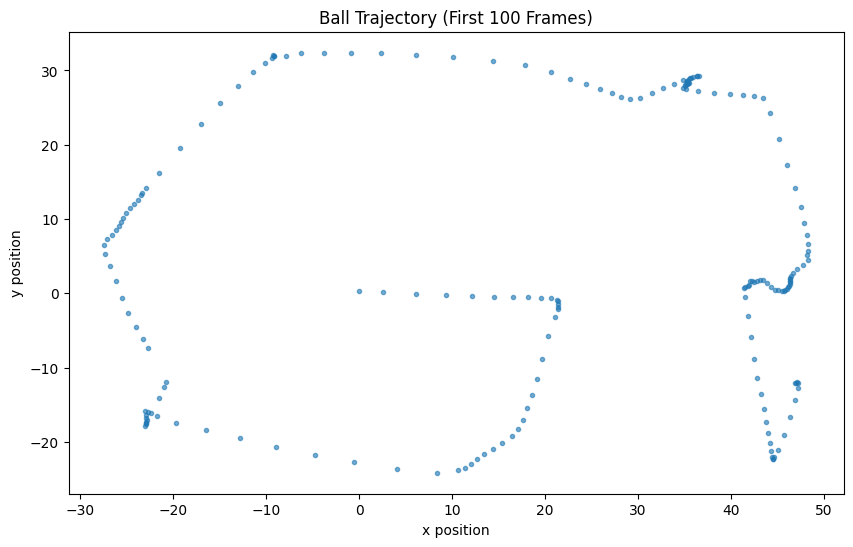

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df["ball_x"], df["ball_y"], ".", alpha=0.6)
plt.title("Ball Trajectory (First 100 Frames)")
plt.xlabel("x position")
plt.ylabel("y position")
plt.show()


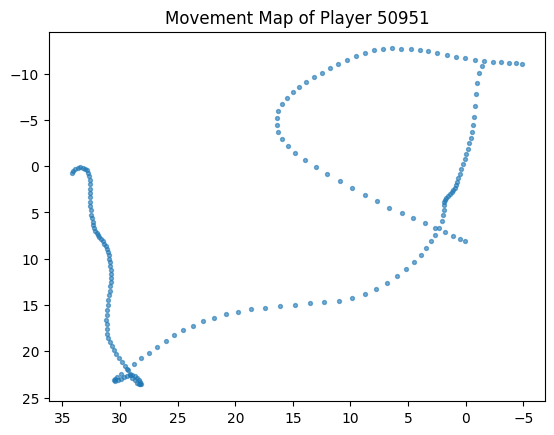

In [17]:
player_id = "50951"

px = df[f"{player_id}_x"]
py = df[f"{player_id}_y"]

plt.scatter(px, py, s=8, alpha=0.6)
plt.title(f"Movement Map of Player {player_id}")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()


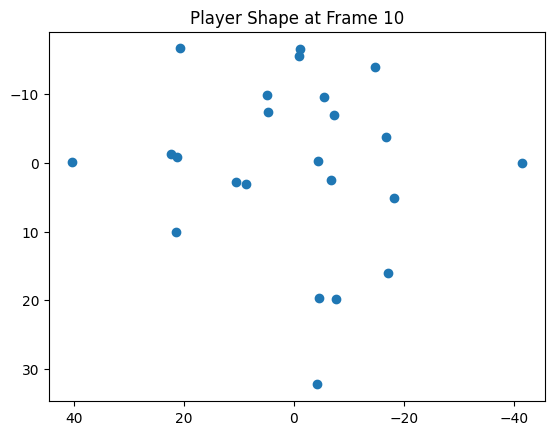

In [18]:
frame_no = 10
snap = df.iloc[frame_no]

player_cols = [c for c in df.columns if c.endswith("_x")]

xs = [snap[col] for col in player_cols]
ys = [snap[col.replace("_x", "_y")] for col in player_cols]

plt.scatter(xs, ys)
plt.title(f"Player Shape at Frame {frame_no}")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
